In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

filename = 'merged_data.csv'
df = pd.read_csv(filename, dtype={'NEXT OPEN HOUSE START TIME': 'str', 'NEXT OPEN HOUSE END TIME': 'str'})
print(df.shape)
print(df.columns)

#delete duplicate rows in dataframe
df_nodup = df.drop_duplicates(subset = ['ADDRESS', 'CITY'])
print(df_nodup.shape)

#delete useless columns
df_dropcol = df_nodup.drop(['Unnamed: 0', 'SALE TYPE', 'STATE', 'DAYS ON MARKET', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'FAVORITE', 'INTERESTED'], axis = 1)
print(df_dropcol.shape)

#delete rows with missing values in important columns
df_na = df_dropcol.replace('', np.nan)
df_nomissing = df_na.dropna(subset = ['SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'YEAR BUILT']) 
print(df_nomissing.shape)


(69468, 28)
Index(['Unnamed: 0', 'SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS',
       'CITY', 'STATE', 'ZIP', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
       'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')
(41250, 28)
(41250, 19)
(31592, 19)


In [113]:
df_nomissing.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
0,October-10-2017,Single Family Residential,717 Neuchatel Ave,BURLINGAME,94010,1450000.0,2.0,1.0,BURLINGAME,940.0,3441.0,1926.0,1543.0,NaN,http://www.redfin.com/CA/Burlingame/717-Neucha...,MLSListings,ML81676096,37.581731,-122.352860
1,June-20-2017,Single Family Residential,544 Heathcliff Dr,PACIFICA,94044,1210000.0,4.0,2.0,PACIFICA,1840.0,8476.0,1958.0,658.0,NaN,http://www.redfin.com/CA/Pacifica/544-Heathcli...,MLSListings,ML81649946,37.646466,-122.475213
2,November-14-2016,Townhouse,1052 Hull Ln,FOSTER CITY,94404,1165000.0,2.0,2.5,FOSTER CITY,1510.0,808.0,1989.0,772.0,435.0,http://www.redfin.com/CA/Foster-City/1052-Hull...,MLSListings,ML81626697,37.548055,-122.255424
3,June-9-2017,Townhouse,855 Columbia Cir,REDWOOD CITY,94065,1500000.0,3.0,3.0,REDWOOD CITY,1939.0,514279.0,1989.0,774.0,455.0,http://www.redfin.com/CA/Redwood-City/855-Colu...,MLSListings,ML81653755,37.536381,-122.237631
4,July-21-2016,Townhouse,316 S Humboldt St,San Mateo,94401,965000.0,2.0,2.5,San Mateo,1580.0,NaN,1999.0,611.0,295.0,http://www.redfin.com/CA/San-Mateo/316-S-Humbo...,San Francisco MLS,445973,37.568960,-122.315889


In [114]:
df_nomissing.columns

Index(['SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'BEDS',
       'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       '$/SQUARE FEET', 'HOA/MONTH',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [115]:
# delete rows which property type is unknown/other/vacant land
df_protype1 = df_nomissing[df_nomissing['PROPERTY TYPE'] != 'Unknown']
df_protype2 = df_protype1[df_protype1['PROPERTY TYPE'] != 'Vacant Land']
df_protype3 = df_protype2[df_protype2['PROPERTY TYPE'] != 'Other']
df_protype = df_protype3[df_protype3['PROPERTY TYPE'] != 'Mobile/Manufactured Home']
df_protype.shape

(31174, 19)

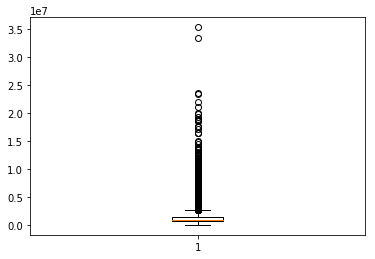

In [116]:
plt.boxplot(df_protype['PRICE'])
plt.show()

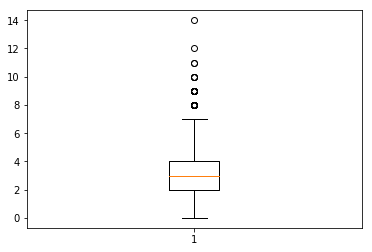

In [117]:
plt.boxplot(df_protype['BEDS'])
plt.show()

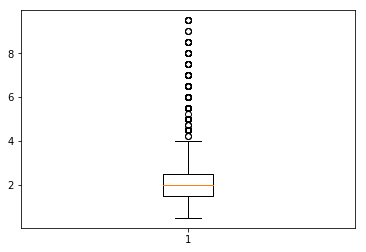

In [118]:
plt.boxplot(df_protype['BATHS'])
plt.show()

In [119]:
# delete outliers
df_byvalue = df_protype.sort_values(by = ['PRICE'])
df_byvalue.head()
df_nooutlier = df_byvalue[df_byvalue['PRICE'] > 100000]
df_nooutlier.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
26087,September-7-2016,Single Family Residential,0 Magic Spring Dr,GILROY,95020,125000.0,1.0,1.0,GILROY,749.0,91619.0,1930.0,167.0,NaN,http://www.redfin.com/CA/Gilroy/301-1st-St-950...,MLSListings,ML81587308,37.013873,-121.576363
62143,May-17-2016,Single Family Residential,680 LOUISIANA St,Oakland,94603,145000.0,2.0,1.0,East Oakland,886.0,6250.0,1925.0,164.0,NaN,http://www.redfin.com/CA/Oakland/680-Louisiana...,EBRD/CCAR/Bay East,40724403,37.739718,-122.186309
53713,December-22-2016,Condo/Co-op,1268 64Th St Unit A,Emeryville,94608,157113.0,2.0,2.0,Emeryville,1052.0,NaN,1998.0,149.0,100.0,http://www.redfin.com/CA/Emeryville/1268-64th-...,EBRD/CCAR/Bay East,40761399,37.845663,-122.288476
25300,February-19-2016,Single Family Residential,6880 Magic Springs Dr,GILROY,95020,170000.0,1.0,1.0,GILROY,900.0,47441.0,1940.0,189.0,NaN,http://www.redfin.com/CA/Gilroy/6880-Magic-Spr...,MLSListings,ML81521303,36.985107,-121.687679
50176,October-20-2017,Condo/Co-op,1849 Shattuck Ave #306,Berkeley,94709,190748.0,1.0,1.0,Gourmet Ghetto,554.0,NaN,1996.0,344.0,375.0,http://www.redfin.com/CA/Berkeley/1849-Shattuc...,EBRD/CCAR/Bay East,40797486,37.874194,-122.268377


In [120]:
df_nooutlier.tail(10)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
6149,October-31-2017,Single Family Residential,43 Tuscaloosa Ave,ATHERTON,94027,18950000.0,7.0,8.0,ATHERTON,12600.0,47480.0,2017.0,1504.0,NaN,http://www.redfin.com/CA/Atherton/43-Tuscaloos...,MLSListings,ML81673919,37.460794,-122.204140
7542,December-8-2016,Single Family Residential,368 Selby Ln,ATHERTON,94027,19250000.0,6.0,6.5,ATHERTON,12856.0,46295.0,2016.0,1497.0,NaN,http://www.redfin.com/CA/Atherton/368-Selby-Ln...,MLSListings,ML81611989,37.450939,-122.215765
7524,April-26-2016,Single Family Residential,190 Almendral,ATHERTON,94027,19750000.0,6.0,8.0,ATHERTON,11160.0,43538.0,2015.0,1770.0,NaN,http://www.redfin.com/CA/Atherton/190-Almendra...,MLSListings,ML81578292,37.453004,-122.214142
6207,May-24-2017,Single Family Residential,2 Somerset Ln,ATHERTON,94027,19900000.0,6.0,8.5,ATHERTON,10909.0,46184.0,2005.0,1824.0,NaN,http://www.redfin.com/CA/Atherton/2-Somerset-L...,MLSListings,ML81648035,37.443937,-122.203726
7508,August-5-2016,Single Family Residential,59 Barry Ln,ATHERTON,94027,21000000.0,6.0,8.5,ATHERTON,14568.0,43995.0,2016.0,1442.0,NaN,http://www.redfin.com/CA/Atherton/59-Barry-Ln-...,MLSListings,ML81589107,37.450897,-122.205250
23803,September-26-2016,Single Family Residential,231 Winding Way,WOODSIDE,94062,22000000.0,6.0,5.0,WOODSIDE,11400.0,121968.0,2016.0,1930.0,NaN,http://www.redfin.com/CA/Woodside/231-Winding-...,MLSListings,ML81596027,37.415543,-122.249049
22641,June-16-2017,Single Family Residential,891 Crystal Springs Rd,HILLSBOROUGH,94010,23364000.0,10.0,9.5,HILLSBOROUGH,16000.0,2064744.0,1916.0,1460.0,NaN,http://www.redfin.com/CA/Hillsborough/Undisclo...,MLSListings,ML81497015,37.547667,-122.342808
38088,December-14-2017,Single Family Residential,215 Coleridge Ave,PALO ALTO,94301,23495000.0,6.0,4.5,PALO ALTO,4586.0,32500.0,1922.0,5123.0,NaN,http://www.redfin.com/CA/Palo-Alto/215-Colerid...,MLSListings,ML81685906,37.436556,-122.149126
7528,December-1-2016,Single Family Residential,246 Atherton Ave,ATHERTON,94027,33350000.0,7.0,8.5,ATHERTON,18258.0,110206.0,2015.0,1827.0,NaN,http://www.redfin.com/CA/Atherton/246-Atherton...,MLSListings,ML81563851,37.445697,-122.213993
7320,November-3-2015,Single Family Residential,119 Tuscaloosa Ave,ATHERTON,94027,35300000.0,7.0,9.5,ATHERTON,20375.0,82000.0,2015.0,1733.0,NaN,http://www.redfin.com/CA/Atherton/119-Tuscaloo...,MLSListings,ML81515494,37.455600,-122.207416


In [121]:
df_nooutlier.sort_values(by = ['BEDS']).tail(20)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
65927,October-30-2015,Multi-Family (2-4 Unit),911 Coburn Ct,San Leandro,94578,940000.0,9.0,5.0,San Leandro,3427.0,7425.0,1964.0,274.0,NaN,http://www.redfin.com/CA/San-Leandro/911-Cobur...,EBRD/CCAR/Bay East,40714135,37.713063,-122.147489
68339,February-23-2018,Multi-Family (2-4 Unit),5809 Elizabeth St,Oakland,94621,730000.0,9.0,5.0,East Oakland,3941.0,5610.0,1965.0,185.0,NaN,http://www.redfin.com/CA/Oakland/5809-Elizabet...,EBRD/CCAR/Bay East,40807824,37.769441,-122.194703
55716,December-21-2017,Multi-Family (2-4 Unit),19137 Lowell Ave,Hayward,94541,1310000.0,9.0,6.5,Cherryland Area,4308.0,17550.0,1973.0,304.0,NaN,http://www.redfin.com/CA/Hayward/19137-Lowell-...,EBRD/CCAR/Bay East,40803812,37.682024,-122.109291
3904,June-30-2017,Multi-Family (2-4 Unit),2814-2818 Harrison St,San Francisco,94110,1755000.0,9.0,3.0,Inner Mission,4813.0,1663.0,1900.0,365.0,NaN,http://www.redfin.com/CA/San-Francisco/2818-Ha...,San Francisco MLS,458801,37.752252,-122.411969
31732,June-8-2017,Single Family Residential,11627 Dawson Dr,LOS ALTOS HILLS,94024,12400000.0,9.0,5.5,LOS ALTOS HILLS,13910.0,249163.0,1939.0,891.0,NaN,http://www.redfin.com/CA/Los-Altos-Hills/11627...,MLSListings,ML81641640,37.350603,-122.114942
3191,August-15-2017,Multi-Family (2-4 Unit),1388 1392 Alabama St,San Francisco,94110,1600000.0,9.0,5.0,San Francisco County,3780.0,2500.0,1900.0,423.0,NaN,http://www.redfin.com/CA/San-Francisco/1392-Al...,BAREIS,21707116,37.749667,-122.410952
3907,July-28-2017,Multi-Family (2-4 Unit),1168 Florida St,SAN FRANCISCO,94110,1825000.0,9.0,3.0,SAN FRANCISCO,3366.0,2596.0,1900.0,542.0,NaN,http://www.redfin.com/CA/San-Francisco/1168-Fl...,MLSListings,ML81656428,37.753202,-122.410388
13255,June-30-2015,Multi-Family (2-4 Unit),65-69 Spruce St,Millbrae,94030,2300000.0,9.0,7.0,Millbrae,5613.0,7500.0,1989.0,410.0,NaN,http://www.redfin.com/CA/Millbrae/69-Spruce-St...,San Francisco MLS,429040,37.610259,-122.394967
62335,April-22-2016,Multi-Family (5+ Unit),3400 High St,Oakland,94619-1844,650000.0,9.0,6.0,Oakland,4800.0,7200.0,1964.0,135.0,NaN,http://www.redfin.com/CA/Oakland/3400-High-St-...,EBRD/CCAR/Bay East,40717358,37.785830,-122.196906
65821,July-17-2015,Multi-Family (2-4 Unit),2007 Quebec,San Leandro,94579,910000.0,9.0,5.0,Washington Manor,3576.0,6168.0,1963.0,254.0,NaN,http://www.redfin.com/CA/San-Leandro/2007-Queb...,EBRD/CCAR/Bay East,40702204,37.678975,-122.154803


In [122]:
df_nooutlier.sort_values(by = ['BATHS']).tail(10)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
7508,August-5-2016,Single Family Residential,59 Barry Ln,ATHERTON,94027,21000000.0,6.0,8.5,ATHERTON,14568.0,43995.0,2016.0,1442.0,NaN,http://www.redfin.com/CA/Atherton/59-Barry-Ln-...,MLSListings,ML81589107,37.450897,-122.205250
7557,February-20-2015,Single Family Residential,303 ATHERTON Ave,Atherton,94027,6700000.0,7.0,9.0,Atherton,11660.0,49484.0,1985.0,575.0,NaN,http://www.redfin.com/CA/Atherton/303-Atherton...,MLSListings,ML81440733,37.439109,-122.217043
43126,December-11-2017,Single Family Residential,14535 Fruitvale Ave,SARATOGA,95070,6150000.0,8.0,9.0,SARATOGA,8244.0,45302.0,2004.0,746.0,NaN,http://www.redfin.com/CA/Saratoga/14535-Fruitv...,MLSListings,ML81676481,37.257966,-122.014337
67776,February-20-2018,Single Family Residential,14329 Miranda Way,LOS ALTOS HILLS,94022,8300000.0,7.0,9.0,LOS ALTOS HILLS,8492.0,43124.0,2015.0,977.0,NaN,http://www.redfin.com/CA/Los-Altos-Hills/14329...,MLSListings,ML81669696,37.386216,-122.130145
22641,June-16-2017,Single Family Residential,891 Crystal Springs Rd,HILLSBOROUGH,94010,23364000.0,10.0,9.5,HILLSBOROUGH,16000.0,2064744.0,1916.0,1460.0,NaN,http://www.redfin.com/CA/Hillsborough/Undisclo...,MLSListings,ML81497015,37.547667,-122.342808
63853,March-15-2016,Single Family Residential,124 Castlewood Dr,Pleasanton,94566,2475000.0,7.0,9.5,Castlewood Area,8931.0,61419.0,1977.0,277.0,NaN,http://www.redfin.com/CA/Pleasanton/124-Castle...,EBRD/CCAR/Bay East,40724602,37.632812,-121.904728
5077,September-8-2017,Single Family Residential,15 Woodgate Ct,HILLSBOROUGH,94010.0,9250000.0,6.0,9.5,HILLSBOROUGH,12616.0,148104.0,2007.0,733.0,NaN,http://www.redfin.com/CA/Hillsborough/15-Woodg...,MLSListings,ML81533776,37.569721,-122.385083
23829,December-18-2015,Single Family Residential,8 Colton Ct,REDWOOD CITY,94062,3500000.0,9.0,9.5,REDWOOD CITY,8000.0,22781.0,1999.0,438.0,95.0,http://www.redfin.com/CA/Redwood-City/8-Colton...,MLSListings,ML81520094,37.460465,-122.277161
524,May-29-2015,Single Family Residential,91 ISABELLA Ave,Atherton,94027,12800000.0,6.0,9.5,Atherton,14358.0,59677.0,1993.0,891.0,NaN,http://www.redfin.com/CA/Atherton/91-Isabella-...,MLSListings,ML81331402,37.454607,-122.197719
7320,November-3-2015,Single Family Residential,119 Tuscaloosa Ave,ATHERTON,94027,35300000.0,7.0,9.5,ATHERTON,20375.0,82000.0,2015.0,1733.0,NaN,http://www.redfin.com/CA/Atherton/119-Tuscaloo...,MLSListings,ML81515494,37.455600,-122.207416


In [123]:
df_nooutlier.shape

(31172, 19)

In [124]:
df_nooutlier.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
26087,September-7-2016,Single Family Residential,0 Magic Spring Dr,GILROY,95020,125000.0,1.0,1.0,GILROY,749.0,91619.0,1930.0,167.0,NaN,http://www.redfin.com/CA/Gilroy/301-1st-St-950...,MLSListings,ML81587308,37.013873,-121.576363
62143,May-17-2016,Single Family Residential,680 LOUISIANA St,Oakland,94603,145000.0,2.0,1.0,East Oakland,886.0,6250.0,1925.0,164.0,NaN,http://www.redfin.com/CA/Oakland/680-Louisiana...,EBRD/CCAR/Bay East,40724403,37.739718,-122.186309
53713,December-22-2016,Condo/Co-op,1268 64Th St Unit A,Emeryville,94608,157113.0,2.0,2.0,Emeryville,1052.0,NaN,1998.0,149.0,100.0,http://www.redfin.com/CA/Emeryville/1268-64th-...,EBRD/CCAR/Bay East,40761399,37.845663,-122.288476
25300,February-19-2016,Single Family Residential,6880 Magic Springs Dr,GILROY,95020,170000.0,1.0,1.0,GILROY,900.0,47441.0,1940.0,189.0,NaN,http://www.redfin.com/CA/Gilroy/6880-Magic-Spr...,MLSListings,ML81521303,36.985107,-121.687679
50176,October-20-2017,Condo/Co-op,1849 Shattuck Ave #306,Berkeley,94709,190748.0,1.0,1.0,Gourmet Ghetto,554.0,NaN,1996.0,344.0,375.0,http://www.redfin.com/CA/Berkeley/1849-Shattuc...,EBRD/CCAR/Bay East,40797486,37.874194,-122.268377


In [128]:
df_nooutlier.replace('Single Family Residential', 'SFH')
df_nooutlier.replace('Multi-Family (2-4 Unit)', 'MFH')
df_nooutlier.replace('Multi-Family (5+ Unit)', 'MFH')
df_nooutlier.replace('Townhouse', 'TH')
df_nooutlier.replace('Condo/Co-op', 'Condo')

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
26087,September-7-2016,Single Family Residential,0 Magic Spring Dr,GILROY,95020,125000.0,1.0,1.0,GILROY,749.0,91619.0,1930.0,167.0,NaN,http://www.redfin.com/CA/Gilroy/301-1st-St-950...,MLSListings,ML81587308,37.013873,-121.576363
62143,May-17-2016,Single Family Residential,680 LOUISIANA St,Oakland,94603,145000.0,2.0,1.0,East Oakland,886.0,6250.0,1925.0,164.0,NaN,http://www.redfin.com/CA/Oakland/680-Louisiana...,EBRD/CCAR/Bay East,40724403,37.739718,-122.186309
53713,December-22-2016,Condo,1268 64Th St Unit A,Emeryville,94608,157113.0,2.0,2.0,Emeryville,1052.0,NaN,1998.0,149.0,100.0,http://www.redfin.com/CA/Emeryville/1268-64th-...,EBRD/CCAR/Bay East,40761399,37.845663,-122.288476
25300,February-19-2016,Single Family Residential,6880 Magic Springs Dr,GILROY,95020,170000.0,1.0,1.0,GILROY,900.0,47441.0,1940.0,189.0,NaN,http://www.redfin.com/CA/Gilroy/6880-Magic-Spr...,MLSListings,ML81521303,36.985107,-121.687679
50176,October-20-2017,Condo,1849 Shattuck Ave #306,Berkeley,94709,190748.0,1.0,1.0,Gourmet Ghetto,554.0,NaN,1996.0,344.0,375.0,http://www.redfin.com/CA/Berkeley/1849-Shattuc...,EBRD/CCAR/Bay East,40797486,37.874194,-122.268377
53912,September-25-2015,Condo,1056 48TH St Unit B,Emeryville,94608,190900.0,2.0,2.0,Emeryville,1094.0,NaN,1993.0,174.0,158.0,http://www.redfin.com/CA/Emeryville/1056-48th-...,EBRD/CCAR/Bay East,40711784,37.836932,-122.279454
62318,February-26-2016,Single Family Residential,1812 74TH Ave,Oakland,94621,192000.0,2.0,1.0,East Oakland,708.0,5400.0,1910.0,271.0,NaN,http://www.redfin.com/CA/Oakland/1812-74th-Ave...,EBRD/CCAR/Bay East,40726415,37.760881,-122.182670
29891,April-24-2015,Condo,8155 WESTWOOD Dr #11,Gilroy,95020,195000.0,1.0,1.0,Gilroy,722.0,1307.0,1979.0,270.0,225.0,http://www.redfin.com/CA/Gilroy/8155-Westwood-...,MLSListings,ML81423779,37.014718,-121.594240
53466,April-26-2016,Condo,1292 63RD St Unit A,Emeryville,94608,195700.0,3.0,2.5,Emeryville Bordr,1534.0,NaN,1994.0,128.0,150.0,http://www.redfin.com/CA/Emeryville/1292-63rd-...,EBRD/CCAR/Bay East,40729244,37.844832,-122.288605
62314,May-28-2015,Single Family Residential,6701 ARTHUR St,Oakland,94605,205000.0,3.0,1.0,Havenscourt,1271.0,4000.0,1925.0,161.0,NaN,http://www.redfin.com/CA/Oakland/6701-Arthur-S...,EBRD/CCAR/Bay East,40697925,37.766913,-122.183815


In [127]:
df_nooutlier.tail()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,LATITUDE,LONGITUDE
38086,September-13-2017,Single Family Residential,1245 Hamilton Ave,PALO ALTO,94301,7828000.0,5.0,4.5,PALO ALTO,4146.0,12000.0,1926.0,1888.0,NaN,http://www.redfin.com/CA/Palo-Alto/1245-Hamilt...,MLSListings,ML81677756,37.454607,-122.145833
67606,February-16-2018,Single Family Residential,1900 Willow Rd,HILLSBOROUGH,94010,7900000.0,5.0,6.0,HILLSBOROUGH,4900.0,22651.0,1955.0,1612.0,NaN,http://www.redfin.com/CA/Hillsborough/1900-Wil...,MLSListings,ML81676565,37.575024,-122.364374
3836,October-6-2017,Single Family Residential,2361 Broadway St,San Francisco,94115,7900000.0,5.0,3.5,Pacific Heights,5375.0,NaN,1914.0,1470.0,NaN,http://www.redfin.com/CA/San-Francisco/2361-Br...,San Francisco MLS,463128,37.793841,-122.435907
38030,November-14-2017,Single Family Residential,1550 Waverley St,PALO ALTO,94301,7950000.0,5.0,3.0,PALO ALTO,3540.0,13125.0,1915.0,2246.0,NaN,http://www.redfin.com/CA/Palo-Alto/1550-Waverl...,MLSListings,ML81679585,37.438695,-122.147443
7543,May-23-2015,Single Family Residential,400 Selby,ATHERTON,94027,8000000.0,3.0,5.5,ATHERTON,3460.0,50403.0,1955.0,2312.0,NaN,http://www.redfin.com/CA/Atherton/400-Selby-Ln...,MLSListings,ML81466738,37.451037,-122.213121
649,September-29-2015,Single Family Residential,33 Farm Ln,HILLSBOROUGH,94010,8000000.0,6.0,8.5,HILLSBOROUGH,8998.0,43124.0,2009.0,889.0,NaN,http://www.redfin.com/CA/Hillsborough/33-Farm-...,MLSListings,ML81484407,37.559996,-122.360263
31699,February-24-2015,Single Family Residential,13300 Burke Rd,LOS ALTOS HILLS,94022,8000000.0,4.0,4.5,LOS ALTOS HILLS,6247.0,62291.0,2002.0,1281.0,NaN,http://www.redfin.com/CA/Los-Altos-Hills/13300...,MLSListings,ML81446843,37.371993,-122.124227
11856,June-22-2015,Single Family Residential,400 Marlowe St,PALO ALTO,94301,8069000.0,5.0,4.0,PALO ALTO,4235.0,12926.0,1935.0,1905.0,NaN,http://www.redfin.com/CA/Palo-Alto/400-Marlowe...,MLSListings,ML81466013,37.456879,-122.150699
7328,May-2-2016,Single Family Residential,88 Tuscaloosa Ave,ATHERTON,94027,8100000.0,4.0,3.5,ATHERTON,3770.0,58139.0,1959.0,2149.0,NaN,http://www.redfin.com/CA/Atherton/88-Tuscaloos...,MLSListings,ML81563204,37.458076,-122.207035
31734,June-18-2015,Single Family Residential,25311 W Fremont Rd,LOS ALTOS HILLS,94022,8100000.0,5.0,5.5,LOS ALTOS HILLS,5873.0,46609.0,1998.0,1379.0,NaN,http://www.redfin.com/CA/Los-Altos-Hills/25311...,MLSListings,ML81460943,37.378574,-122.121626


In [89]:
df_type['CITY'] = df_type['CITY'].apply(lambda city: city.upper())

KeyError: 'CITY'

In [51]:
df_nooutlier.to_csv('cleaned_data.csv')